In [163]:
pip install MVPanalytics --upgrade

  Attempting uninstall: MVPanalytics
    Found existing installation: MVPanalytics 0.1.12
    Uninstalling MVPanalytics-0.1.12:
      Successfully uninstalled MVPanalytics-0.1.12
Note: you may need to restart the kernel to use updated packages.


In [1]:
from MVPanalytics.keitaro import keitaro_parser
from MVPanalytics.graphics import plot_external
from MVPanalytics.analysis import streamdiff
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

c:\Users\Kirill\anaconda3\Lib\site-packages\MVPanalytics\analysis.py:74: SyntaxWarning: invalid escape sequence '\o'
  '''


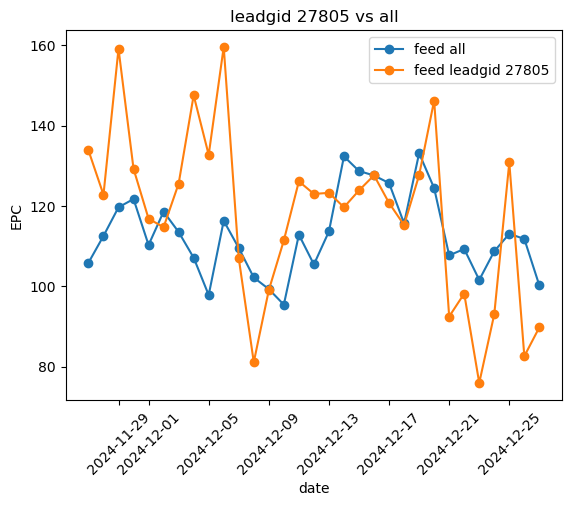

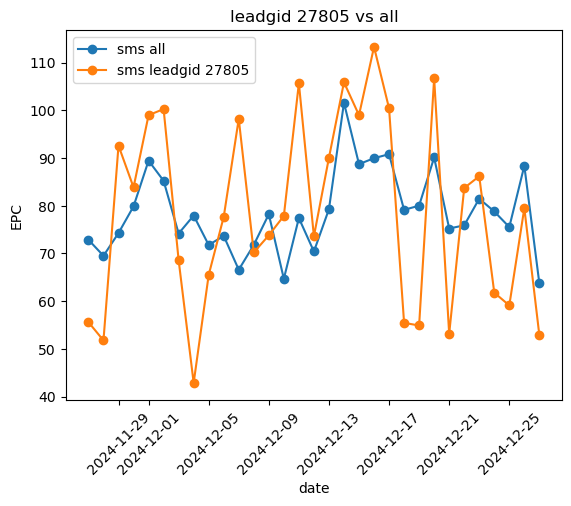

In [5]:
p_e = {
    'api_key':'0c93a0126375b8bef301e9c2c49785a7',
    'host' : 'https://tracker.mvpgroup.ru/',
    'interval' : '1_month_ago',
    'filters' : [
{'name': "offer_group_id", 'operator': "NOT_EQUAL", 'expression': 11},
{'name': "sub_id_14", 'operator': "IN_LIST", 'expression': ["185", '186']}],
'grouping' : ["sub_id_12", "day"],
'metrics' : ["epc_confirmed", "cr", "approve", "clicks", "sales",'conversions', "sale_revenue"]
}

p_a = {
    'api_key':'0c93a0126375b8bef301e9c2c49785a7',
    'host' : 'https://tracker.mvpgroup.ru/',
    'interval' : '1_month_ago',
    'filters' : [
{'name': "offer_group_id", 'operator': "NOT_EQUAL", 'expression': 11}],
'grouping' : ["sub_id_12", "day"],
'metrics' : ["epc_confirmed", "cr", "approve", "clicks", "sales",'conversions', "sale_revenue"]
}

plot_external(p_e, p_a, type_ = 'FF', external_name = 'leadgid 27805')
plot_external(p_e, p_a, type_ = 'SS', external_name = 'leadgid 27805')

In [161]:
def streamdiff(params_ext, target, metric, channel, minclick):
    strm = keitaro_parser(**params_ext)
    strm = strm.loc[strm['clicks']>minclick]
    retr = strm[strm[metric] > target].groupby(channel).count()[[metric]].merge(strm[strm[metric] < target].groupby(channel).count()[[metric]], right_index=True, left_index=True, how = 'outer', suffixes = ['_more '+str(target), '_less '+str(target)]).fillna(0)
    retr['percent >'+str(target)] = retr[metric+'_more '+str(target)]*100/(retr[metric+'_more '+str(target)] + retr[metric+'_less '+str(target)])
    retr = retr.merge(strm[[channel, 'clicks']].groupby(channel).sum()['clicks'], right_index = True, left_index = True)
    if metric == 'epc_confirmed':
        retr = retr.merge(strm[[channel, 'sale_revenue']].groupby(channel).sum()['sale_revenue'], right_index = True, left_index = True)
        retr[metric+' for period'] = retr['sale_revenue']/retr['clicks']
        retr.drop(columns=['sale_revenue'], inplace=True)
    return(retr.sort_values('percent >'+str(target), ascending = 0))        

In [4]:
p_vitr = {
    'api_key':'0c93a0126375b8bef301e9c2c49785a7',
    'host' : 'https://tracker.mvpgroup.ru/',
    'interval' : '1_month_ago',
    'filters' : [
{'name': "offer_group_id", 'operator': "NOT_EQUAL", 'expression': 11},
{'name': "sub_id_14", 'operator': "IN_LIST", 'expression': ["126"]}],
'grouping' : ["day", 'stream'],
'metrics' : ["epc_confirmed", "cr", "approve", "clicks", "sales",'conversions', "sale_revenue"]
}

In [5]:
streamdiff(p_vitr, 90, metric='epc_confirmed',channel='stream', minclick=5)

,epc_confirmed_more 90,epc_confirmed_less 90,percent >90,clicks,epc_confirmed for period
stream,,,,,
Srochnodengi,20.0,6,76.923077,1089,184.940312
Vivus,8.0,3,72.727273,283,235.714240
Zaymer,14.0,8,63.636364,1287,171.445221
Denginadom,4.0,3,57.142857,303,141.221122
Smsfinance,9.0,8,52.941176,1160,104.822414
Ykky,9.0,11,45.000000,398,127.241457
Ekapusta,13.0,16,44.827586,1031,110.151891
Webbankir,12.0,15,44.444444,945,151.993831
Moneyman,3.0,4,42.857143,353,58.215297


In [ ]:
def plot_external(params_chan, params_all, type_, external_name):
    """
    Строит графики для сравнения динамики по каким-то каналам (витринам\офферам\потомкам)

    Args:
        sub_14: list() - список из необходимых sub_14 (нужен и sms и feed).
        type_: string - FS, если необходимо сравнить feed и sms в рамках external: FF, если необходимо сравнить feed всего трафика и feed в рамках external; SS если необходимо сравнить smsвсего трафика и sms в рамках external.
        external_name: string - Название external
        params_chan: dict() - параметры запроса в keitro_parser в external для считывания данных по уникальному каналу, который необходимо посмотреть (витрина\оффер\поток и тд) (в metrics обязана быть epc_confirmed в grouping - ["sub_id_12", "day"])
        params_all: dict() - параметры запроса в keitro_parser в external для считывания данных по общему потоку (в metrics обязана быть epc_confirmed в grouping - ["sub_id_12", "day"])
    
    """
    from MVPanalytics.keitaro import keitaro_parser
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    pars = keitaro_parser(**params_chan).sort_values('day')
    
    
    pars_all = keitaro_parser(**params_all).sort_values('day')
    
    
    if type_ == 'FS':
        plt.plot(pars.loc[pars['sub_id_12']=='feed'].set_index('day')['epc_confirmed'], marker = 'o', label = 'feed')
        plt.plot(pars.loc[pars['sub_id_12']=='sms'].set_index('day')['epc_confirmed'], marker = 'o', label = 'sms')

        plt.legend()
        plt.title(external_name)
        plt.xlabel('date')
        plt.ylabel('EPC')
        plt.xticks(rotation = 45)

        plt.show()
    elif type_ == 'FF':
        plt.plot(pars_all.loc[pars_all['sub_id_12']=='feed'].set_index('day')['epc_confirmed'], marker = 'o', label = 'feed all')
        plt.plot(pars.loc[pars['sub_id_12']=='feed'].set_index('day')['epc_confirmed'], marker = 'o', label = 'feed leadstech')


        plt.legend()
        plt.title(f'{external_name} vs all')
        plt.xlabel('date')
        plt.ylabel('EPC')
        plt.xticks(rotation = 45)

        plt.show()
    elif type_ == 'SS':
        plt.plot(pars_all.loc[pars_all['sub_id_12']=='sms'].set_index('day')['epc_confirmed'], marker = 'o', label = 'sms all')
        plt.plot(pars.loc[pars['sub_id_12']=='sms'].set_index('day')['epc_confirmed'], marker = 'o', label = 'sms leadstech')


        plt.legend()
        plt.title(f'{external_name} vs all')
        plt.xlabel('date')
        plt.ylabel('EPC')
        plt.xticks(rotation = 45)

        plt.show()
    else:
        return(print('ОШИБКА: Неверный тип графика. Тип должен быть "FS", "FF", "SS"'))